# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Lywen Chandra
- **Email:** lim.lywen15@gmail.com
- **ID Dicoding:** lywcodes

## Menentukan Pertanyaan Bisnis

- How do weather conditions (e.g., temperature, humidity, wind speed) impact the number of bike rentals?
- What is the difference in bike rental counts between weekdays and weekends?
- Which season has the highest demand among bike renters, based on data from both Casual and Registered customers?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [13]:
day_df = pd.read_csv("https://raw.githubusercontent.com/LywCodes/Project_Analisis-Data/main/dataset/day.csv")

day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/LywCodes/Project_Analisis-Data/main/dataset/hour.csv")

hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- All of the data type match


### Assesing day_df Data

In [15]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**there is no problem from the data above**

In [19]:
print("Number of Duplicates: ", day_df.duplicated().sum())

day_df.describe()

Number of Duplicates:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [20]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [25]:
day_df[day_df.yr == day_df.yr.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
365,366,2012-01-01,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294
366,367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
367,368,2012-01-03,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236
368,369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368
369,370,2012-01-05,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Cleaning Data

In [ ]:
datetime_columns = ["dteday", "yr", "mnth"]

for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column], errors='coerce')

# Menampilkan tipe data setelah perubahan
print(hour_df.dtypes)


instant                int64
dteday        datetime64[ns]
season                 int64
yr            datetime64[ns]
mnth          datetime64[ns]
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [10]:
hour_df['yr'] = hour_df['yr'].dt.year.astype('int64')  
hour_df['mnth'] = hour_df['mnth'].dt.month.astype('int64') 


print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [11]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column], errors='coerce')


print(day_df.dtypes)


instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


### Rename some columns so it may show a good visualization

In [25]:
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

In [16]:
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})



In [19]:
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

**Insight:**

- Berdasarkan data yang telah dikumpulkan dan dilakukan pengecekan untuk dianalisa, pada hasil analsia dapat disimpulkan hanya dateday saja yang kita ubah format nya sesuai dokumentasi readme.txt yang dilampirkan. sisanya tidak ada data yang perlu di bersihkan karena setiap data itu berharga jadi jika terpakai maupun tidak selama data tersebut valid tidak perlu didrop atau dihilangkan, selama tidak ada missing value, duplicate, anomali dan kesalahan format

- Merubah nama pada column data agar menampilkan data yang dapat dipahami secara visual dan tidak menimbulkan ambiguity
  

## Exploratory Data Analysis (EDA)

### Explore ...

**Day_DF data Exploration**

1. Group bicycle renters (both casual and registered) by month

In [14]:
day_df.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
       max   min         mean     sum
mnth                                 
1     4521   431  2176.338710  134933
2     5062  1005  2655.298246  151352
3     8362   605  3692.258065  228920
4     7460   795  4484.900000  269094
5     8294  2633  5349.774194  331686
6     8120  3767  5772.366667  346342
7     8173  3285  5563.677419  344948
8     7865  1115  5664.419355  351194
9     8714  1842  5766.516667  345991
10    8156    22  5199.225806  322352
11    6852  1495  4247.183333  254831
12    6606   441  3403.806452  211036

**Insight:**
- from the data above we can conclude that the month that has the largest average and the largest number is June. otherway, the smallest average and smallest number were in January.

2. Group bicycle renters (both casual and registered) based on weather conditions

In [15]:

day_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})


cnt                           
             max  min         mean      sum
weathersit                                 
1           8714  431  4876.786177  2257952
2           8362  605  4035.862348   996858
3           4639   22  1803.285714    37869

**Insight:**
- Based on the data above, it can be concluded that bicycle renters tend to rent bicycles when the weather is sunny or cloudy, very rarely when it snows, and not at all when the weather is bad.

3. Group bicycle renters (both casual and registered) by holiday

In [16]:

day_df.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

4. Based on the results above, it can be concluded that bicycle renters rent bicycles more often on weekdays than on weekends. 

In [18]:
day_df.groupby(by='weekday').agg({
    'cnt':['max','min','mean']
})

cnt                   
          max   min         mean
weekday                         
0        8227   605  4228.828571
1        7525    22  4338.123810
2        7767   683  4510.663462
3        8173   441  4548.538462
4        7804   431  4667.259615
5        8362  1167  4690.288462
6        8714   627  4550.542857


Based on the results above, the order of the average number of renters from largest to smallest is: Friday (5), Thursday (4), Saturday (6), Wednesday (3), Tuesday (2), Monday (1), and Sunday (0).

5. roup bicycle renters (both casual and registered) based on working days:

In [20]:
day_df.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean']
})

cnt                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

Based on the results above, the highest number of bicycle rentals occurs on working days compared to weekends. However, we can also observe that the results differ, although not significantly.

6. Group bicycle renters (both casual and registered) by season:

In [21]:

day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
})

casual   registered   cnt                   
               mean         mean   max   min         mean
season                                                   
1        334.928177  2269.204420  7836   431  2604.132597
2       1106.097826  3886.233696  8362   795  4992.331522
3       1202.611702  4441.691489  8714  1115  5644.303191
4        729.112360  3999.050562  8555    22  4728.162921

Based on the results of the analysis above, bicycle renters, both casual and registered, prefer autumn, as indicated by the highest average. In contrast, spring has the fewest rentals, with the smallest average.

7. Group temp, hum, and humidity based on season:

In [27]:
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719

**Based on the results of the analysis above, the following conclusions can be drawn:**

The highest average temperature occurs in autumn (fall season), followed by summer, winter, and spring. The highest average humidity is observed in the winter season, followed by fall, summer, and spring.

8. Relationship between casual, registered and count tenants:

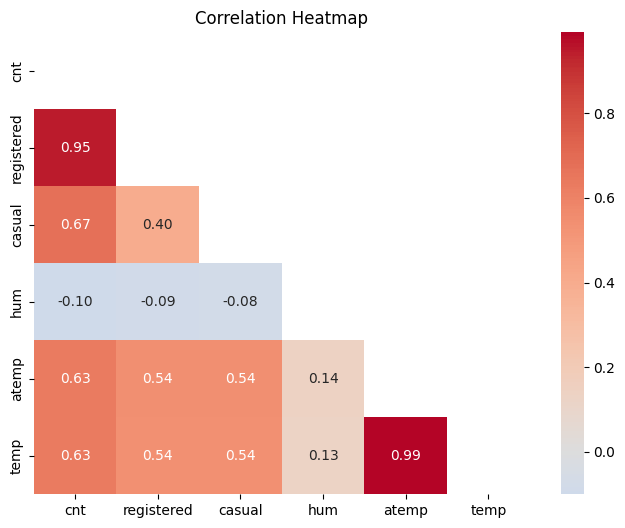

In [24]:
# Membatasi hanya ke variabel yang diinginkan
selected_columns = ['cnt', 'registered', 'casual', 'hum', 'atemp', 'temp']
filtered_correlation_matrix = day_df[selected_columns].corr(numeric_only=True)

# Membuat mask untuk bagian atas heatmap
mask = np.triu(np.ones_like(filtered_correlation_matrix, dtype=bool))

# Plot heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    filtered_correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()


**Based on the results of the analysis above, the following statements were obtained:**

- atemp and temp are highly correlated (0.99).
- hum has a weak correlation with temp and atemp (0.13 and 0.14).
- casual is moderately correlated with temp and atemp (0.54), and slightly negatively correlated with hum (-0.08).
- registered shows the same pattern as casual and is moderately correlated with casual (0.40).
- count is strongly correlated with temp, atemp, casual, and registered (0.63, 0.63, 0.67, and 0.95), and slightly negatively correlated with hum (-0.10).

## Visualization & Explanatory Analysis

### Question 1: How do weather conditions (e.g., temperature, humidity, wind speed) impact the number of bike rentals?


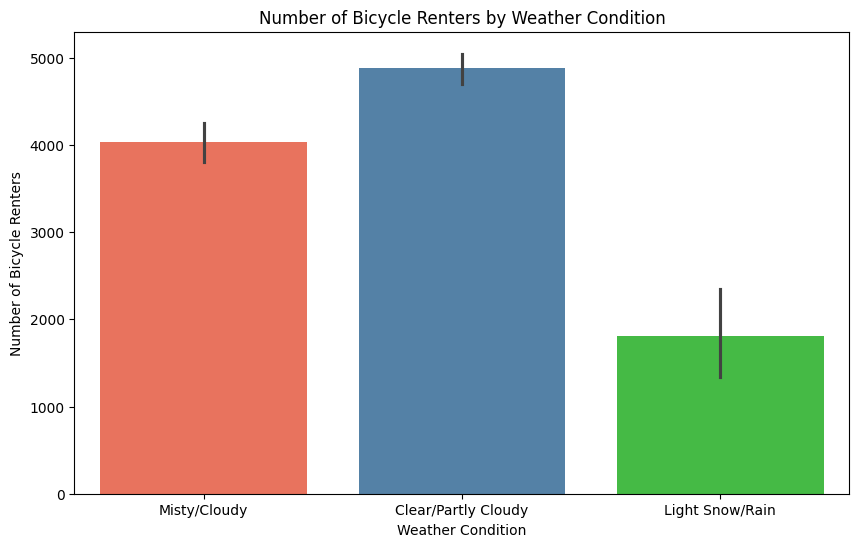

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weathersit',
    y='cnt',
    data=day_df,
    hue='weathersit',  
    palette=['#FF6347', '#4682B4', '#32CD32']  
)

plt.title('Number of Bicycle Renters by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Bicycle Renters') 
plt.show()


Based on the data visualization using a boxplot, it can be concluded that there is a clear relationship between weather conditions and bicycle rentals. The most popular weather conditions for bicycle rentals are sunny or partly cloudy, followed by foggy or overcast weather. The least popular conditions are those with light snow or rain.

### Question 2: What is the difference in bike rental counts between weekdays and weekends?


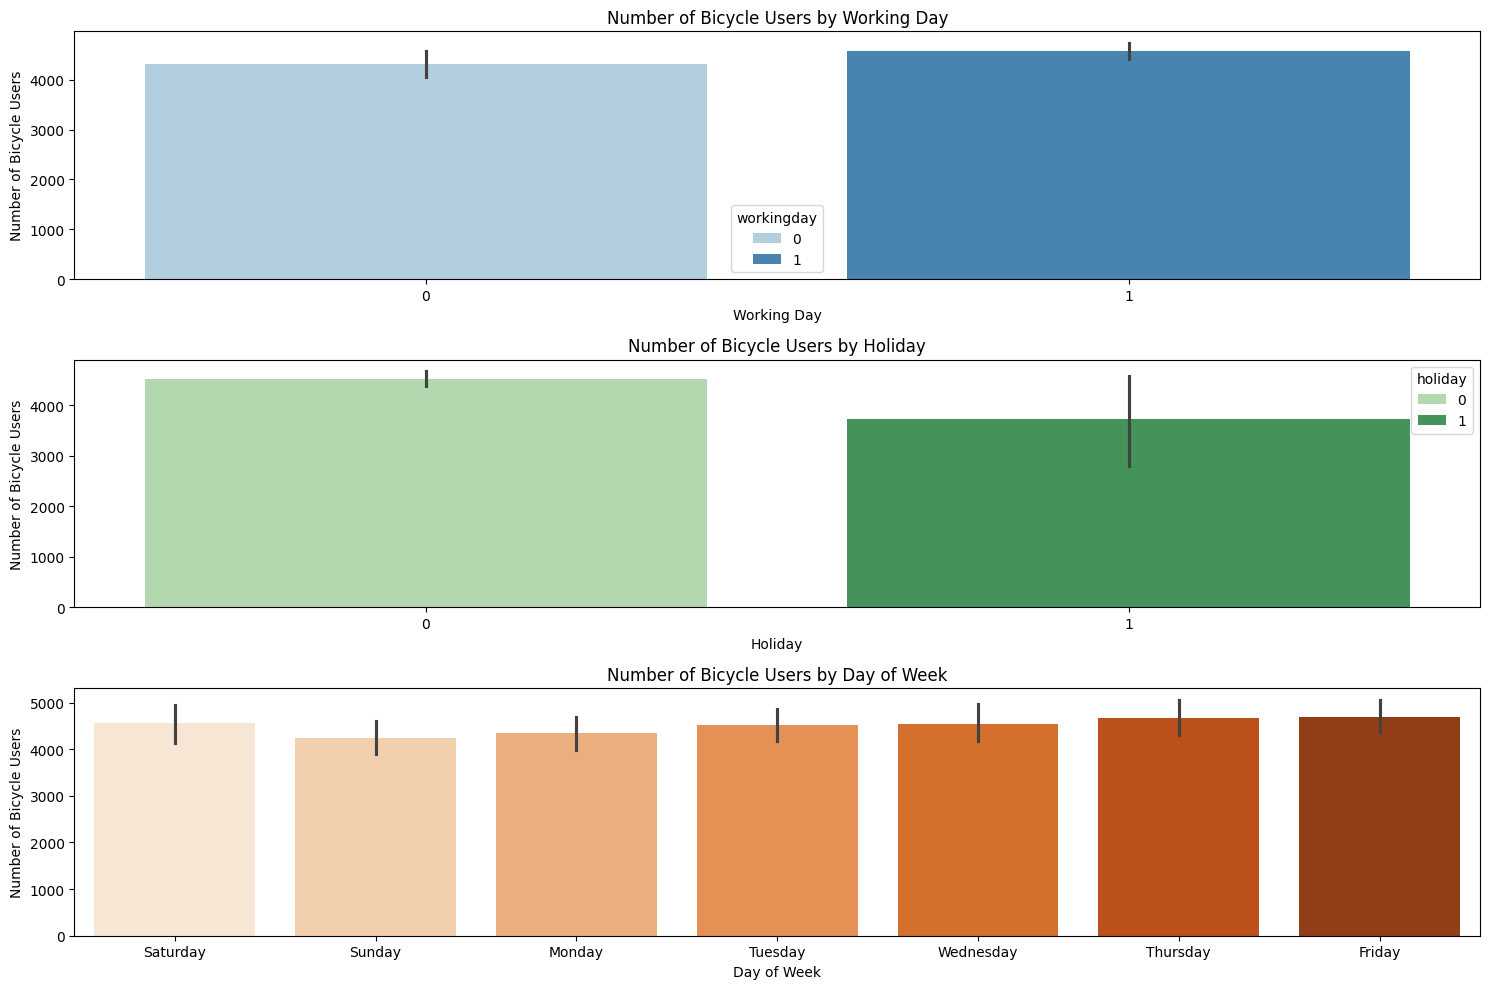

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# Based on working day
sns.barplot(
    x='workingday',
    y='cnt',
    data=day_df,
    ax=axes[0],
    hue='workingday',  # Add hue to avoid deprecation warning
    palette='Blues')  # Blue palette
axes[0].set_title('Number of Bicycle Users by Working Day')
axes[0].set_xlabel('Working Day')
axes[0].set_ylabel('Number of Bicycle Users')

# Based on holiday
sns.barplot(
    x='holiday',
    y='cnt',
    data=day_df,
    ax=axes[1],
    hue='holiday',  # Add hue to avoid deprecation warning
    palette='Greens')  # Green palette
axes[1].set_title('Number of Bicycle Users by Holiday')
axes[1].set_xlabel('Holiday')
axes[1].set_ylabel('Number of Bicycle Users')

# Based on weekday
sns.barplot(
    x='weekday',
    y='cnt',
    data=day_df,
    ax=axes[2],
    hue='weekday',  # Add hue to avoid deprecation warning
    palette='Oranges')  # Orange palette
axes[2].set_title('Number of Bicycle Users by Day of Week')
axes[2].set_xlabel('Day of Week')
axes[2].set_ylabel('Number of Bicycle Users')

plt.tight_layout()
plt.show()


**Based on the data visualization above using a bar plot, the following conclusions can be drawn:**

1. The number of bicycle renters is higher on weekdays (Monday to Friday) compared to weekends (Saturday and Sunday), where 0 represents weekends and 1 represents weekdays.
2. The number of bicycle renters is significantly higher on weekdays (non-holidays) than on (national) holidays.
3. Among all weekdays, Friday holds the highest number of bicycle renters, while Sunday has the fewest number of bicycle renters.

### Question 3: Which season has the highest demand among bike renters, based on data from both Casual and Registered customers?

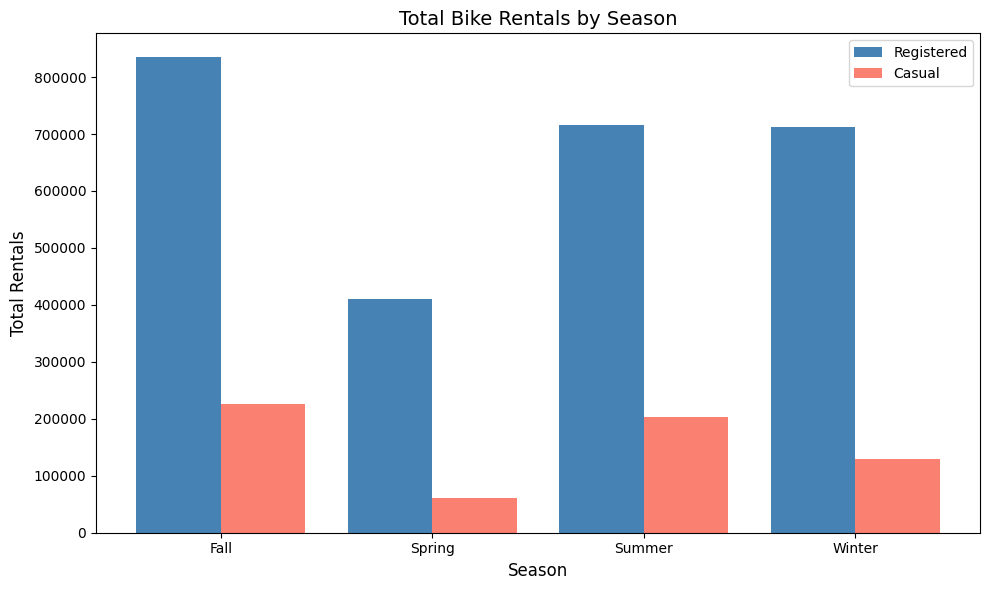

In [26]:
# Grouping data by season and calculating the total registered and casual usage
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))


bar_width = 0.4  
x = range(len(seasonal_usage['season']))

plt.bar(
    [pos - bar_width / 2 for pos in x],
    seasonal_usage['registered'],
    width=bar_width,
    label='Registered',
    color='steelblue'
)

plt.bar(
    [pos + bar_width / 2 for pos in x],
    seasonal_usage['casual'],
    width=bar_width,
    label='Casual',
    color='salmon'
)

# Labeling and adding the legend
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.title('Total Bike Rentals by Season', fontsize=14)
plt.xticks(x, seasonal_usage['season'], fontsize=10)  # Set x-axis labels to match the seasons
plt.legend()
plt.tight_layout()
plt.show()


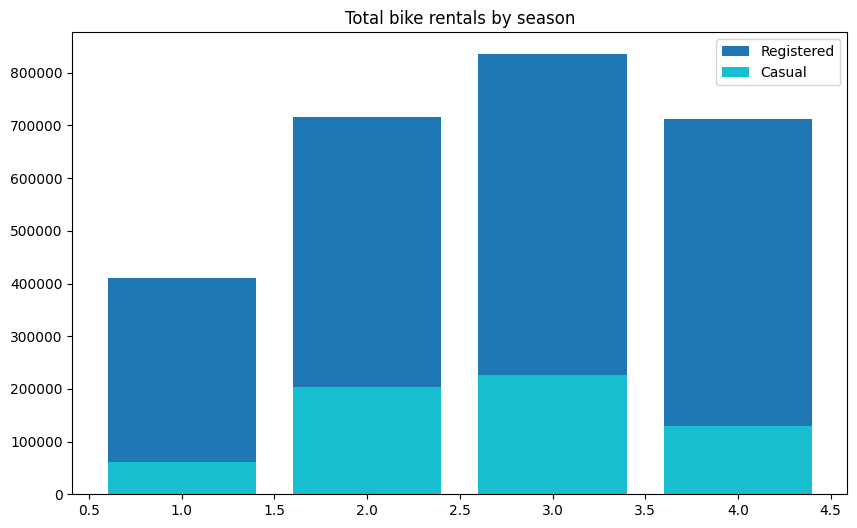

In [24]:

# Grouping data based on the season and calculating the total registered and casual usage
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))


plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:cyan'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Total bike rentals by season')
plt.legend()
plt.show()

**Based on the data visualization above using a bar plot, the following conclusions can be drawn:**
-Based on the analysis above using the bar plot, it can be concluded that the most enjoyed season for bike users, both Casual and Registered, is autumn (the most favored by both groups), followed by summer, winter, and lastly, spring.

In [49]:
day_df.to_csv('day.csv', index=False)

print("Data telah disimpan kembali ke day.csv")

Data telah disimpan kembali ke day.csv


## Conclusion

- Conclution Question 1
It is clearly evident that there is a relationship between weather conditions and bike rentals. Renters prefer clear or partly cloudy weather, with Q3 above 6000, Q1 below 4000, and a median close to 5000. The second most preferred weather condition is misty or cloudy weather, with Q3 above 5000, Q1 below 3000, and a median above 4000. Lastly, renters are less inclined to rent bikes when it's lightly snowy or rainy, with Q3 above 2000, Q1 below 1000, and a median above 1000. There are no data for extreme weather like a heavy storm, as it is not feasible to bike under such conditions.

- Conclution Question 2
The trends shown in the visualization can be divided into three parts. For bike users based on working days, working days lead slightly over non-working days, although the difference is not highly significant, both being above 4000 users. For holidays, non-holidays dominate with a significant difference from holidays. This may indicate that people prefer renting bikes on regular days rather than holidays. Lastly, based on weekdays, Friday ranks first with an average of 4690.29, while Sunday ranks last with 4228.83.

- Conclution Question 3 From the visualization, it can be concluded that autumn is the season with the highest number of bike rentals, both for registered and casual users, followed by summer, winter, and spring. Interestingly, summer is slightly more popular than winter, even with a small margin, and winter is more favored than spring. However, this could be influenced by several factors such as holidays, weather conditions, air temperature, and other aspects.